In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
import import_ipynb
from deep_learning_equations import break_datasets

C:\Users\Hp\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Hp\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Hp\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Hp\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1)

importing Jupyter notebook from deep_learning_equations.ipynb
(array([1.1, 0. , 0.9]), array([1.1, 0. , 0.9]))


In [2]:
#This testcase is from Andrew Ng

def load_dataset():
    train_dataset = h5py.File('datasets/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y


def predict(X, parameters):
    
    W1 = tf.convert_to_tensor(parameters["W1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["W2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["W3"])
    b3 = tf.convert_to_tensor(parameters["b3"])
    
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3}
    
    x = tf.placeholder("float", [12288, 1])
    
    z3 = forward_propagation_for_predict(x, params)
    p = tf.argmax(z3)
    
    sess = tf.Session()
    prediction = sess.run(p, feed_dict = {x: X})
        
    return prediction

def forward_propagation_for_predict(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3'] 
                                                           # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1, X), b1)                      # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                     # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)                     # Z3 = np.dot(W3,Z2) + b3
    
    return Z3
    

In [3]:
# Loading the dataset
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

y = 5


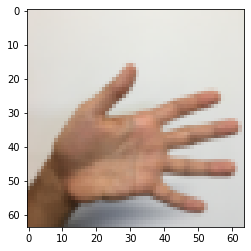

In [4]:
# Example of a picture
index = 0
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [5]:
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T
# Normalize image vectors
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.
# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (12288, 1080)
Y_train shape: (6, 1080)
X_test shape: (12288, 120)
Y_test shape: (6, 120)


In [6]:
def parameters_initializer(layers_dims):
    #initialize the parameters weight with xavier initializer and bias as zero.
    #input: layers dims - a list consist of number of nodes from layer 0 (input layer) to layer L-1 (output layer)
    L=len(layers_dims)
    parameters={}
    for i in range(1,L):
        W=tf.get_variable(f"W{i}",shape=[layers_dims[i],layers_dims[i-1]],initializer=tf.contrib.layers.xavier_initializer())
        b=tf.get_variable(f"b{i}",shape=[layers_dims[i],1],initializer=tf.zeros_initializer())
        parameters[f"W{i}"]=W
        parameters[f"b{i}"]=b
    return parameters

In [7]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters=parameters_initializer([6,3,1])
    print(parameters)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

{'W1': <tf.Variable 'W1:0' shape=(3, 6) dtype=float32_ref>, 'b1': <tf.Variable 'b1:0' shape=(3, 1) dtype=float32_ref>, 'W2': <tf.Variable 'W2:0' shape=(1, 3) dtype=float32_ref>, 'b2': <tf.Variable 'b2:0' shape=(1, 1) dtype=float32_ref>}


In [8]:
def dataset_placeholder(n_X,n_Y):
    #to create a placeholder tensor for the dataset
    #input: 
    #n_X is the number of feature (nodes) from the input of each data
    #n_Y is the number of feature (nodes) from the desired output of each data
    
    #output:
    #returns placeholders called X and Y with data type of 64 bytes of float. The amount of row is the feature, and the amount of collumn
    #is the amount datasets
    X=tf.placeholder(tf.float32,name='X',shape=[n_X,None]) #initialize none means the size is flexible
    Y=tf.placeholder(tf.float32,name='Y',shape=[n_Y,None]) #initialize none means the size is flexible
    return X,Y

In [9]:
tf.reset_default_graph()
with tf.Session() as sess:
    X,Y=dataset_placeholder(6,1)
    print(X)
    print(Y)

Tensor("X:0", shape=(6, ?), dtype=float32)
Tensor("Y:0", shape=(1, ?), dtype=float32)


In [10]:
def forward_propagation(X,layers_dims,parameters,activation1="relu"):
    #do the forward propagation from layer 1 to layer L-2 (1 layer before output). Activation function is deemed as the same activation
    #function throughout this function
    
    #Input:
    #X - n_x by None placeholder for the input dataset
    #layers_dims - a list from layer 0(input) to layer L-1(output) consists of number of nodes throughout the Neural Network
    #activation: the desired activation function: available choices:
    #- relu
    #- sigmoid
    #- tanh
    #- softmax
    
    L=len(layers_dims)
    caches={}
    caches[f"A0"]=X #just in case
    for i in range(1,L-1):
        caches[f"Z{i}"]=tf.add(tf.matmul(parameters[f"W{i}"],caches[f"A{i-1}"]),parameters[f"b{i}"])
        if activation1=="relu":
            caches[f"A{i}"]=tf.nn.relu(caches[f"Z{i}"])
        elif activation1=="sigmoid":
            caches[f"A{i}"]=tf.sigmoid(caches[f"Z{i}"])
        elif activation1=="tanh":
            caches[f"A{i}"]=tf.tanh(caches[f"Z{i}"])
        else:
            caches[f"A{i}"]=tf.softmax(caches[f"Z{i}"])
    caches[f"Z{L-1}"]=tf.add(tf.matmul(parameters[f"W{L-1}"],caches[f"A{L-2}"]),parameters[f"b{L-1}"])
    return caches[f"Z{L-1}"]

In [11]:
def compute_cost(Z3,Y,activation_final="sigmoid"):
    #input:
    #Z3= the linear version of the final layer, but need to be transposed to be the shape(datapoints, number of nodes)
    #Y= the expected output of the final layer, but need to be transposed to be the shapw(datapoints, number of nodes)
    #activation_final= only 2 choice, sigmoid for binary classification, and softmax for multiclass classification
    
    #output:
    #cost=the reduce_mean version of the loss function with logistic regression
    transposed_Z3=tf.transpose(Z3) #to be inputted need to be transposed first
    transposed_Y=tf.transpose(Y) #to be inputted need to be transposed first
    
    if activation_final=="sigmoid":
        #sigmoid cross entropy with logits will return [amount] tensor
        #because the reduce mean has 'none' dimension, hence it will mean all the dimension and return a 1x1 tensor, which is the cost
        cost=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=transposed_Y,logits=transposed_Z3))
    elif activation_final=="softmax":
        #softmax cross entropy with logits will return [amount] tensor
        #because the reduce mean has 'none' dimension, hence it will mean all the dimension and return a 1x1 tensor, which is the cost
        cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=transposed_Y, logits=transposed_Z3))
    else:
        print("activation_final is not recognized!")
        raise ValueError
    return cost

In [12]:
tf.reset_default_graph()
layers_dims=[6,6,1]
with tf.Session() as sess:
    X,Y=dataset_placeholder(layers_dims[0],layers_dims[-1])
    parameters=parameters_initializer(layers_dims)
    ZL=forward_propagation(X,layers_dims,parameters,activation1="relu")
    cost=compute_cost(ZL,Y,activation_final="sigmoid")
    print("cost = "+str(cost))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
cost = Tensor("Mean:0", shape=(), dtype=float32)


In [13]:
def model(X_data,Y_data,layers_dims,activation1="relu",activation_final="sigmoid",epoch_num=1500,learning_rate=0.0001,printcost=False,minibatch_size=32):
    #input:
    #X_data: the numpy array containing the datapoints for the input, in shape of: [nodes, datapoint amount]
    #Y_data: the numpy array containing the datapoints for the expected output, in shape of: [nodes, datapoints amount]
    #layers_dims: the array containing the number of nodes from layer 0(input layer) to layer L-1(the output layer)
    #activation 1: the activation function that will be used for layer 1 to layer L-2, available choices:
    #- sigmoid
    #- tanh
    #- relu
    #- softmax
    #activation_final: the activation function that will be used for the last layer(L-1),available choices:
    #-sigmoid
    #-softmax
    #epoch_num: for the number of epoch that will be done
    
    #output:
    #parameters=a dictionary containing the trained parameters
    
    tf.reset_default_graph() #restart the variables if re-running the function
    costs=[] # to keep track all of the costs
    m=X_data.shape[1] #the amount of the data
    
    #create placeholders
    X,Y=dataset_placeholder(layers_dims[0],layers_dims[-1]) #set the n_x as the first layers dims and the n_y as the last layers dims
    #initialize parameters
    parameters=parameters_initializer(layers_dims)
    #forward propagation
    ZL=forward_propagation(X,layers_dims,parameters,activation1="relu")
    #compute cost
    cost=compute_cost(ZL,Y,activation_final="sigmoid")
    #backpropagation with the desired method (currently ADAM)
    optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    #starting session, initialize the global variable
    init=tf.global_variables_initializer()
    
    #running the session
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(epoch_num):
            epochCost=0 #the current cost of the epoch, that will be added to the costs list every end of an epoch
            minibatchCount=math.ceil(m/minibatch_size)
            batches = break_datasets(X_data,Y_data,minibatch_size)
            for minibatch in batches:
                minibatchX,minibatchY = minibatch
                
                #start running, the first argument is only _ because it is a trash (only to run optimizer), hence why it is discarded, it is only a function to find thee optima; parameters
                #for the cost we put it to count the epoch_cost in the future
                _,minibatchCost=sess.run([optimizer,cost],feed_dict={X:minibatchX,Y:minibatchY})
                epochCost += minibatchCost
            #finish running one epoch, start storing the cost for printing and graphing
            epochCost/=minibatchCount
            # Print the cost every epoch
            if printcost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epochCost))
            if printcost == True and epoch % 5 == 0:
                costs.append(epochCost)
    
        #session finished, try plotting the graph for matplotlib
        plt.plot(np.squeeze(costs))
        plt.ylabel("cost")
        plt.xlabel("iterations (per fives)")
        plt.title("Model with Learning rate =" + str(learning_rate))
        plt.show()
        
                
        #returning the final parameters
        #remember to use run everytime we want to evaluate the value of a tensor
        parameters = sess.run(parameters)
        print("Parameters successfully saved!")
        
        #print the accuracy
        equalRate = tf.equal(tf.argmax(ZL), tf.argmax(Y))

        # Calculate accuracy on the test set
        finalAccuracy = tf.reduce_mean(tf.cast(equalRate, "float"))

        print ("Accuracy:", finalAccuracy.eval({X: X_train, Y: Y_train}))
        return parameters

In [33]:
def predict(X_data,parameters, activation1, activation_final):
    #intent: this function is used as a final prediction test for trained parameters
    #pre: input the numpy array of the data to be predicted (x_data) and the value of the parameters
    #make sure that the X_data input is in a shape of [features][amounts]
    #post: return numpy array of the predicition result
    
    layersDims = []
    convertedParameters={}
    maxLayer = 0
    for key in parameters:
        if(key[0] == 'W'):
            layersDims.append(parameters[key].shape[1])
            maxLayer = max(int(key[1]), maxLayer)
        convertedParameters[key]=tf.convert_to_tensor(parameters[key])
    layersDims.append(parameters[f'W{maxLayer}'].shape[1])
    
    #create placeholder
    xPlaceholder = tf.placeholder(tf.float32,name='xPlaceHolder',shape=X_data.shape)
    ZL = forward_propagation(xPlaceholder,layersDims,convertedParameters,activation1)
    
    #do the final activation function,  only sigmoid and softmax is accepted
    if activation_final == "sigmoid":
        #sigmoid
        AL = tf.nn.sigmoid(tf.transpose(ZL))
    else:
        #softmax
        AL = tf.nn.softmax(tf.transpose(ZL))
    
    predict = tf.argmax(AL)
    
    sess = tf.Session()
    prediction = sess.run(predict, feed_dict = {xPlaceholder: X_data})
        
    return prediction


(12288, 1080)
Cost after epoch 0: 0.682463
Cost after epoch 100: 0.341484
Cost after epoch 200: 0.284111
Cost after epoch 300: 0.246714
Cost after epoch 400: 0.219294
Cost after epoch 500: 0.182755
Cost after epoch 600: 0.162545


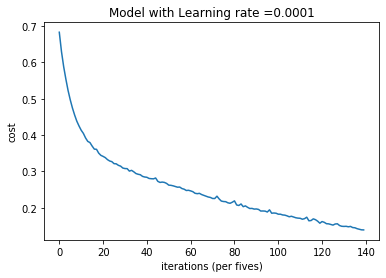

Parameters successfully saved!
Accuracy: 0.8972222


In [25]:
print(X_train.shape)
parameters = model(X_train, Y_train, [12288, 25, 12, 6],printcost=True, activation_final = "softmax", epoch_num = 700)

In [27]:
parametersFinal = parameters

==
6
==
Your algorithm predicts: y = [0 0 0 0 0 0]


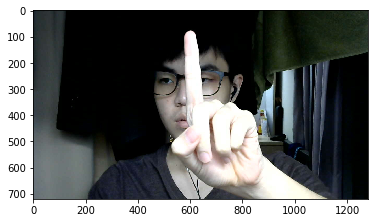

In [43]:
from skimage.transform import resize
from PIL import Image
import imageio
## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image='1.jpg'
## END CODE HERE ##
print("==")
print(len(parametersFinal))
print("==")
# We preprocess your image to fit your algorithm.
fname = "images/" + my_image
image = np.array(imageio.imread(fname))
image = image/255.
my_image = resize(image, output_shape=(64,64)).reshape((1, 64*64*3)).T
my_image_prediction = predict(my_image, parametersFinal, "relu", "softmax")

plt.imshow(image)
print("Your algorithm predicts: y = " + str(np.squeeze(my_image_prediction)))